In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('../../data/example-1.csv', index_col = 0)

In [4]:
data.head()

,FM18_CH3OH_4.1/day,FM18_CH3OH_4.1/day_R1,FM20_no-lim_5.2/day,FM20_no-lim_5.2/day_R1,FM21_no-lim_5.4/day,FM21_no-lim_5.4/day_R1,FM21_no-lim_5.4/day_R2,FM12_CH4-lim_3.0/day,FM12_CH4-lim_3.0/day_R1,FM14_CH4-lim_3.0/day,...,FM34_+Cu_2.7/day_t480m,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2
id,,,,,,,,,,,,,,,,,,,,,
MBURv2_100001,0.192390,0.399056,0.226044,0.031919,-0.259212,0.024218,-0.375939,-0.662138,-0.664962,-0.340741,...,-0.169520,-0.714689,0.375098,0.230305,0.045003,-0.026448,-0.136418,-0.239295,-0.400820,-0.313184
MBURv2_100002,-0.405649,-0.309960,-0.581343,-1.050033,-1.235838,-0.529028,-1.161497,-1.274654,-1.243865,-1.715639,...,-2.717254,-2.980653,-0.202880,-2.423929,-0.404706,-1.477967,-1.135770,-1.251409,-1.323482,-1.384361
MBURv2_10001,-0.349818,-0.432159,-0.748817,-1.126519,-1.176547,-0.974533,-1.157318,-1.812235,-1.774428,-1.724550,...,-2.819275,-2.497711,-1.428475,-1.240548,-1.345572,-1.410063,-2.228331,-1.943554,-2.684422,-2.403920
MBURv2_10002,-0.429268,0.644220,0.573052,0.232233,-0.060841,0.395560,-0.097191,-1.325059,-1.769956,-0.577714,...,0.187883,-0.253695,0.061458,-0.387287,0.545962,0.114193,-0.076866,-0.000965,-0.226299,-0.229278
MBURv2_10003,-0.475120,-0.160000,-0.398919,-0.153891,-0.364631,-0.543518,-0.403339,-1.106884,-1.116421,-0.932348,...,-0.737528,-1.391160,-0.835128,-1.039627,-0.662973,-0.845406,-1.228497,-1.149969,-1.464724,-1.412012


PCA projection figure

In [9]:
def pca_projection(data,kvalue):
    
    X = data

    kmeans = KMeans(n_clusters = kvalue, max_iter=300, random_state=4)
    kmeans.fit(X)

    labels_kmeans = kmeans.labels_
    df_clusterid = pd.DataFrame(labels_kmeans, index=data.index)
    df_clusterid.rename(columns={0: "cluster"}, inplace=True)
    df = pd.concat([data, df_clusterid], axis=1)
    
    features = list(df.columns)[:-1]#delete the last one column:clusterid
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,['cluster']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['PC1', 'PC2'])
    principalDf.index = df.index
    finalDf = pd.concat([principalDf, df[['cluster']]], axis = 1)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)

    cluster_id = list(finalDf['cluster'].unique())
    #colors = ['r', 'g', 'b']
    #for cluster_id, color in zip(targets,colors):
    for i in cluster_id:
        indicesToKeep = finalDf['cluster'] == i
        ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
                   , finalDf.loc[indicesToKeep, 'PC2']
                   #, c = color 
                   , s = 50)
    ax.legend(cluster_id)
    ax.grid()
    
    return fig

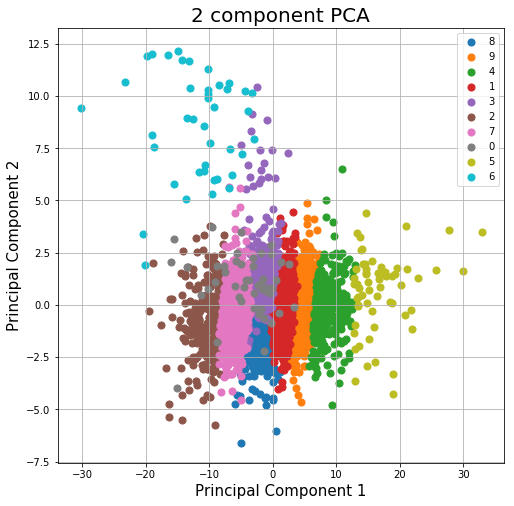

In [10]:
pca_projection(data,10)

### PCA Projection to 2D

In [ ]:
pca.explained_variance_ratio_

In [ ]:
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np


    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in xrange(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in xrange(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap

In [ ]:
new_cmap = rand_cmap(100, type='bright', first_color_black=True, last_color_black=False, verbose=True)